In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
Wine_DF = pd.read_csv("wine.data.csv", sep = ",")

In [3]:
Wine_DF.head()

,Class Identifier,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanod phenols,Proanthecyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


1. Exploratory analysis
a. Compute the distribution of the classes
b. Check if any of the data samples have missing values, and if so, replace them with appropriate
imputed values
c. Plot the correlation between all pairs of attributes (including the class attribute)
d. Divide the data randomly into a training, validation dataset and a test dataset in a 70:10:20
ratio

In [4]:
#Exploratoty analysis
Wine_DF.describe()

,Class Identifier,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanod phenols,Proanthecyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
Wine_DF.isnull().any()

Class Identifier                False
Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of Ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanod phenols             False
Proanthecyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

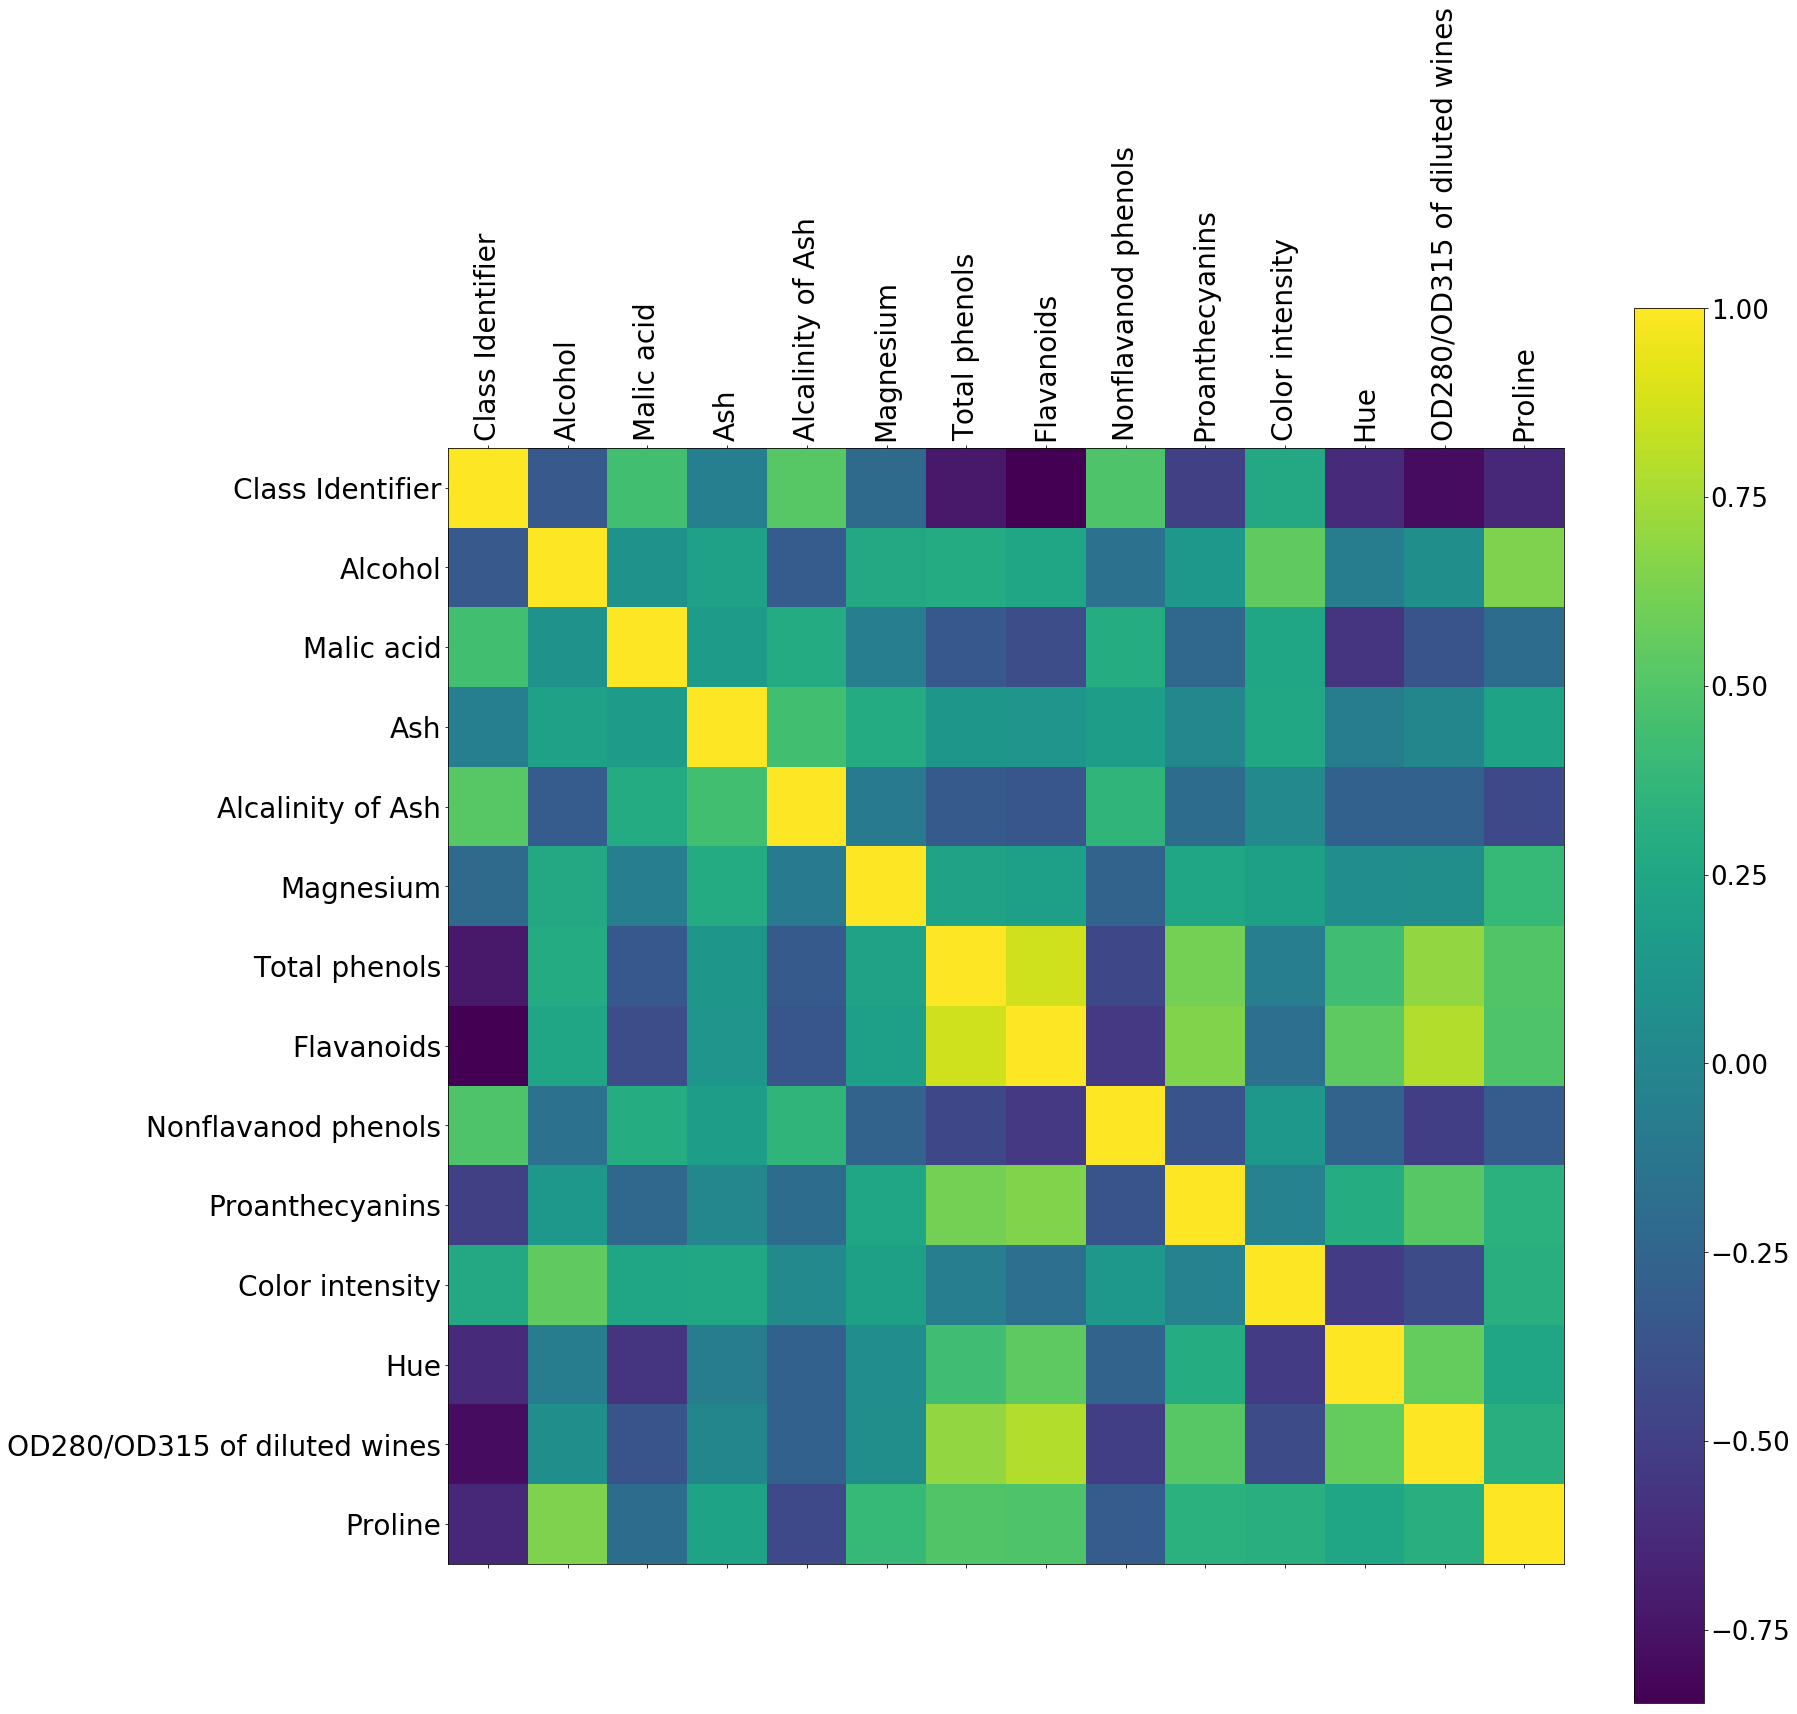

In [6]:
#Plotting correlation
f = plt.figure(figsize=(25, 25))  
plt.matshow(Wine_DF.corr(),fignum=f.number)  
plt.xticks(range(len(Wine_DF.columns)), Wine_DF.columns, fontsize = 28,rotation=90)
plt.yticks(range(len(Wine_DF.columns)), Wine_DF.columns, fontsize = 28)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=26)


plt.show()

In [7]:
#Setting up Features and labels
Wine_Features = Wine_DF.loc[:, Wine_DF.columns !='Class Identifier'].copy()
Wine_label = Wine_DF[['Class Identifier']]

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = Wine_Features
y = Wine_label

#Creating Training, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)
# .7 Training / .1 val / .2 Test
# .8 of the original train * .125 will equal .1  Subtract .8 with .1 because .1 is the validation set and .7 is the train
#leaving the remaining .2 as the test set

Decision Tree Classifier
a. Train a Decision Tree classifier on the training data using Gini Index as the impurity measure.
b. Compute the classification accuracy on the training, validation and test data.
c. Try alternative values for any hyperparameters you selected and see if the validation accuracy improves. Compute the test accuracy for the best setting.

When the test set is 30%, any combination of test and validation should get you an accuracy score of 1.0

In [9]:
#Making decision tree and fitting it
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
print("Training set")
y_predict = model.predict(X_train)
target_names = ['1', '2', "3"]
print(classification_report(y_train, y_predict, target_names=target_names))
print("Accuracy " + str(accuracy_score(y_train, y_predict)))

Training set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Accuracy 1.0


In [11]:
print("Validation Set")
y_predict = model.predict(X_val)
target_names = ['1', '2', "3"]
print(classification_report(y_val, y_predict, target_names=target_names))
print("Accuracy " + str(accuracy_score(y_val, y_predict)))

Validation Set
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.78      0.88      0.82         8
           3       0.80      0.80      0.80         5

   micro avg       0.83      0.83      0.83        18
   macro avg       0.86      0.83      0.84        18
weighted avg       0.85      0.83      0.84        18

Accuracy 0.8333333333333334


In [12]:
print("Test Set")
y_predict = model.predict(X_test)
target_names = ['1', '2', "3"]
print(classification_report(y_test, y_predict, target_names=target_names))
print("Accuracy " + str(accuracy_score(y_test, y_predict)))

Test Set
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00         9

   micro avg       0.94      0.94      0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

Accuracy 0.9444444444444444


In [13]:
#Playing with Hyperparameters to find best accuracy for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= .3, random_state=1)

In [14]:
#Test accuracry for the best setting
y_predict = model.predict(X_val)
accuracy_score(y_val, y_predict)

1.0

Use k-NN with Euclidean distance and k = 5.
b. Compute the classification accuracy on the training, validation and test data.
c. Try alternative values of k (such as 1, 3, 7, 9) and see if the validation accuracy improves.  Compute the test accuracy for the best setting.
d. Repeat steps b and c after normalizing the input features

C- The best validation accuracy for both un-normalized and normalized were when K was low, 1 or 3.  Once K began to increase the accuracy began to fall.

In [15]:
print("KNN as 5, Test set")
from sklearn.neighbors import KNeighborsClassifier
#Re-importing to make sure all the sets are still 70,10,20
X = Wine_Features
y = Wine_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

#Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())

N_y_pred = knn.predict(X_test)
target_names = ['1', '2', "3"]
print(classification_report(y_test, N_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_test, N_y_pred))

KNN as 5, Test set
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.64      0.69      0.67        13
           3       0.44      0.44      0.44         9

   micro avg       0.69      0.69      0.69        36
   macro avg       0.67      0.66      0.67        36
weighted avg       0.70      0.69      0.70        36

Accuracy: 0.6944444444444444


In [16]:
print('Train set')
N_y_pred = knn.predict(X_train)
target_names = ['1', '2', "3"]
print(classification_report(y_train, N_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_train, N_y_pred))

Train set
              precision    recall  f1-score   support

           1       0.92      0.90      0.91        40
           2       0.85      0.78      0.81        50
           3       0.72      0.82      0.77        34

   micro avg       0.83      0.83      0.83       124
   macro avg       0.83      0.83      0.83       124
weighted avg       0.84      0.83      0.83       124

Accuracy: 0.8306451612903226


In [17]:
print("Validation set")
N_y_pred = knn.predict(X_val)
target_names = ['1', '2', "3"]
print(classification_report(y_val, N_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_val, N_y_pred))

Validation set
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.71      0.62      0.67         8
           3       0.40      0.40      0.40         5

   micro avg       0.67      0.67      0.67        18
   macro avg       0.65      0.67      0.66        18
weighted avg       0.66      0.67      0.66        18

Accuracy: 0.6666666666666666


In [18]:
print("K is 1")
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())
N_y_pred = knn.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, N_y_pred))

K is 1
Accuracy: 0.7777777777777778


In [19]:
print("K is 3")
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())
N_y_pred = knn.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, N_y_pred))

K is 3
Accuracy: 0.7777777777777778


In [20]:
print("K is 7")
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())
N_y_pred = knn.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, N_y_pred))

K is 7
Accuracy: 0.6111111111111112


In [21]:
print("K is 9")
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())
N_y_pred = knn.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, N_y_pred))

K is 9
Accuracy: 0.7222222222222222


In [22]:
print("K is 12.  As K increases accuracy stays low and does not get better than the earlier lower K values")
knn = KNeighborsClassifier(n_neighbors = 12, metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())
N_y_pred = knn.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, N_y_pred))

K is 12.  As K increases accuracy stays low and does not get better than the earlier lower K values
Accuracy: 0.6111111111111112


In [23]:
#Normalizing the data

from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)

In [24]:
#Training the sets on the normalized data
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

print("Normalized Test set, K = 5")

knn_normalized = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_normalized.fit(X_train, y_train.values.ravel())
Normalized_y_pred = knn_normalized.predict(X_test)
target_names = ['1', '2', "3"]
print(classification_report(y_test, Normalized_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_test, Normalized_y_pred))

Normalized Test set, K = 5
              precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.67      0.92      0.77        13
           3       0.71      0.56      0.63         9

   micro avg       0.78      0.78      0.78        36
   macro avg       0.79      0.75      0.76        36
weighted avg       0.81      0.78      0.78        36

Accuracy: 0.7777777777777778


In [25]:
print("Normalized Training set, K = 5")
knn_normalized = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_normalized.fit(X_train, y_train.values.ravel())
Normalized_y_pred = knn_normalized.predict(X_train)
target_names = ['1', '2', "3"]
print(classification_report(y_train, Normalized_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_train, Normalized_y_pred))

Normalized Training set, K = 5
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        40
           2       0.85      0.88      0.86        50
           3       0.84      0.79      0.82        34

   micro avg       0.87      0.87      0.87       124
   macro avg       0.87      0.87      0.87       124
weighted avg       0.87      0.87      0.87       124

Accuracy: 0.8709677419354839


In [26]:
print("Normalized Validation Set, K = 5")
knn_normalized = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_normalized.fit(X_train, y_train.values.ravel())
Normalized_y_pred = knn_normalized.predict(X_val)
target_names = ['1', '2', "3"]
print(classification_report(y_val, Normalized_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_val, Normalized_y_pred))

Normalized Validation Set, K = 5
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.70      0.88      0.78         8
           3       0.67      0.40      0.50         5

   micro avg       0.78      0.78      0.78        18
   macro avg       0.79      0.76      0.76        18
weighted avg       0.77      0.78      0.76        18

Accuracy: 0.7777777777777778


In [27]:
print("K = 1")
knn_normalized = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
knn_normalized.fit(X_train, y_train.values.ravel())
Normalized_y_pred = knn_normalized.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, Normalized_y_pred))

K = 1
Accuracy: 0.7777777777777778


In [28]:
print("K = 3")
knn_normalized = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn_normalized.fit(X_train, y_train.values.ravel())
Normalized_y_pred = knn_normalized.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, Normalized_y_pred))

K = 3
Accuracy: 0.7777777777777778


In [29]:
print("K = 7")
knn_normalized = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn_normalized.fit(X_train, y_train.values.ravel())
Normalized_y_pred = knn_normalized.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, Normalized_y_pred))

K = 7
Accuracy: 0.5


In [30]:
print("K = 9")
knn_normalized = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
knn_normalized.fit(X_train, y_train.values.ravel())
Normalized_y_pred = knn_normalized.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, Normalized_y_pred))

K = 9
Accuracy: 0.5555555555555556


In [31]:
print("K = 12.  As K increases accuracy stays low and does not get better than the earlier lower K values")
knn_normalized = KNeighborsClassifier(n_neighbors = 12, metric = 'euclidean')
knn_normalized.fit(X_train, y_train.values.ravel())
Normalized_y_pred = knn_normalized.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, Normalized_y_pred))


K = 12.  As K increases accuracy stays low and does not get better than the earlier lower K values
Accuracy: 0.5555555555555556


Cross-validation
a. Use 5-fold cross-validation to train and evaluate the decision tree and k-NN classifiers, using 4 folds for training and one for testing. 

In [32]:
from sklearn.model_selection import cross_val_score
#The decision tree was called model - renamed it
Decision_tree = model
X = Wine_Features
y = Wine_label
#cv = 5 means crossfold validation will be set to 5
scores_Dtree = cross_val_score(Decision_tree, X, y.values.ravel(), cv=5, scoring='accuracy')
#The score is shown after each fold
print(scores_Dtree)
print(scores_Dtree.mean())

[0.86486486 0.86111111 0.94444444 0.91428571 0.85294118]
0.8875294622353446


In [33]:
scores_KNN = cross_val_score(knn, X, y.values.ravel(), cv=5, scoring='accuracy')
print(scores_KNN)
print(scores_KNN.mean())


[0.64864865 0.66666667 0.66666667 0.74285714 0.73529412]
0.6920266484972367


Other classifiers
a. Train and test any two of Random Forest, Logistic Regression, SVM or ANN for this problem and use cross validation to compare the results with those of Decision Tree and k-NN.

In [34]:
#Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

from sklearn.ensemble import RandomForestClassifier
Rand_For_Class = RandomForestClassifier(n_estimators = 100)
Rand_For_Class.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
print("RandomForest Test set")
Forest_y_pred = Rand_For_Class.predict(X_test)
target_names = ['1', '2', "3"]
print(classification_report(y_test, Forest_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_test, Forest_y_pred))


RandomForest Test set
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 0.9722222222222222


In [36]:
print("RandomForest Training set")
Forest_y_pred = Rand_For_Class.predict(X_train)
target_names = ['1', '2', "3"]
print(classification_report(y_train, Forest_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_train, Forest_y_pred))


RandomForest Training set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Accuracy: 1.0


In [37]:
print("RandomeForest Validation set")
Forest_y_pred = Rand_For_Class.predict(X_val)
target_names = ['1', '2', "3"]
print(classification_report(y_val, Forest_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_val, Forest_y_pred))


RandomeForest Validation set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Accuracy: 1.0


In [38]:
X = Wine_Features
y = Wine_label
scores_RandF = cross_val_score(Rand_For_Class, X, y.values.ravel(), cv=5, scoring='accuracy')
print(scores_RandF)
print(scores_RandF.mean())


[0.94594595 0.97222222 1.         1.         1.        ]
0.9836336336336335


In [39]:
# SVM Classifier 

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train.values.ravel())



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
print('SVM test set')
SVC_y_pred = svclassifier.predict(X_test)

target_names = ['1', '2', "3"]
print(classification_report(y_test, SVC_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_test, SVC_y_pred))

SVM test set
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.92      0.92      0.92        13
           3       1.00      0.89      0.94         9

   micro avg       0.94      0.94      0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

Accuracy: 0.9444444444444444


In [41]:
print("SVM train set")
SVC_y_pred = svclassifier.predict(X_train)

target_names = ['1', '2', "3"]
print(classification_report(y_train, SVC_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_train, SVC_y_pred))

SVM train set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Accuracy: 1.0


In [42]:
print("SVM val set")
SVC_y_pred = svclassifier.predict(X_val)

target_names = ['1', '2', "3"]
print(classification_report(y_val, SVC_y_pred, target_names=target_names))
print("Accuracy:",metrics.accuracy_score(y_val, SVC_y_pred))

SVM val set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Accuracy: 1.0


In [43]:
X = Wine_Features
y = Wine_label
scores_svc = cross_val_score(svclassifier, X, y.values.ravel(), cv=5, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.86486486 0.97222222 0.97222222 1.         1.        ]
0.961861861861862


In [44]:
print("Cross Validation Scores")
print("Decision tree " + str(scores_Dtree.mean()))
print("KNN " + str(scores_KNN.mean()))
print("Random Forest " + str(scores_RandF.mean()))
print('SVC ' + str(scores_svc.mean()))
print(" ")
print("The Random forest and SVC classifiers perform much better than the Decision tree or KNN classifiers")

Cross Validation Scores
Decision tree 0.8875294622353446
KNN 0.6920266484972367
Random Forest 0.9836336336336335
SVC 0.961861861861862
 
The Random forest and SVC classifiers perform much better than the Decision tree or KNN classifiers


Sources:
    Correlation plot:https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas and http://benalexkeen.com/correlation-in-python/
    Traing/val/test split https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
    https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
    TreeClassifier - http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/ - https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn%20#from%20sklearn.model_selection%20import%20train_test_split
    
   KNN help -
    https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/
    Cross-Validation -
    https://www.ritchieng.com/machine-learning-cross-validation/
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    Random Forest Classifier-
    https://www.datacamp.com/community/tutorials/random-forests-classifier-python
    SVM classifier -
    https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
    